<a href="https://colab.research.google.com/github/pranayDgr8/Computer-Vision-Implementations/blob/main/CVHC_ForegroundExtractn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foreground Extraction Techniques**
Pranaydeep Mayank....19BAI1026

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = "/content/drive/MyDrive/brain MRI/yes/Y104.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)

width: 700 pixels
height: 890 pixels
channels: 3


In [ ]:
gray.shape

(590, 500)

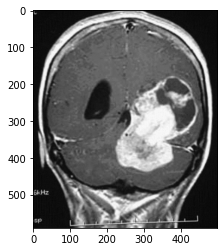

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
plt.imshow(gray,cmap='gray')

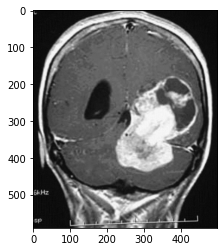

In [ ]:
plt.imshow(image,cmap='gray')

## **GRAB Cut**

In [ ]:
mask = np.zeros(image.shape[:2], np.uint8)

In [ ]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  

In [ ]:
rectangle = (50,50, 450, 450)

In [ ]:
cv2.grabCut(image, mask, rectangle, 
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
  

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]], dtype=uint8),
 array([[5.93820163e-01, 1.41016154e-01, 2.60765731e-02, 1.87812713e-01,
         5.12743969e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00053102e+02, 1.00053102e+02, 1.00053102e+02, 1.57090938e+02,
         1.57090938e+02, 1.57090938e+02, 7.92932011e+01, 7.92932011e+01,
         7.92932011e+01, 1.11771956e+02, 1.11771956e+02, 1.11771956e+02,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.00000000e-02, 1.12051586e+01, 1.11951586e+01, 1.11951586e+01,
         1.11951586e+01, 1.12051586e+01, 1.11951586e+01, 1.11951586e+01,
         1.11951586e+01, 1.12051586e+01, 5.00619273e+02, 5.00609273e+02,
         5.00609273e+02, 5.00609273e+02, 5.0

In [ ]:
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

In [ ]:
image = image * mask2[:, :, np.newaxis]

Extracted images for different dimensions of rectangle

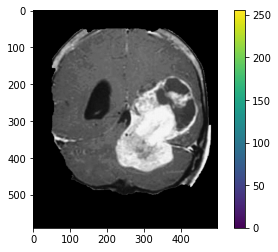

In [ ]:
plt.imshow(image)
plt.colorbar()
plt.show()

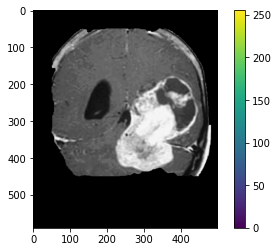

In [ ]:
plt.imshow(image) #rectangle = (50,50, 450, 400)
plt.colorbar()
plt.show()

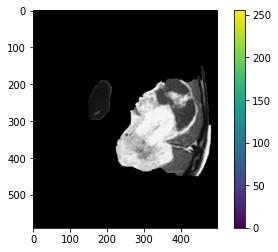

In [ ]:
plt.imshow(image) #rectangle = (150,150, 500, 500)
plt.colorbar()
plt.show()

# **Tumor prediction using contour detection.**

## Thresholding

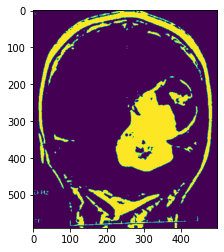

In [ ]:
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

## **Morphological Operations**
Erosion 


Dilation

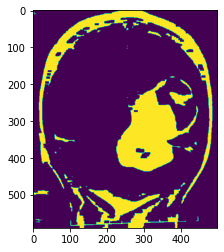

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

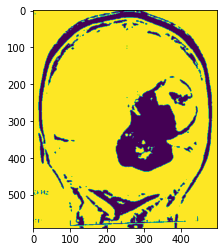

In [ ]:
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

In [ ]:
closed = cv2.erode(closed, None, iterations = 19)
closed = cv2.dilate(closed, None, iterations = 17)

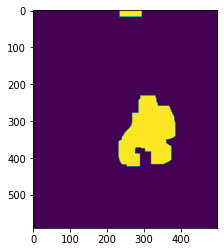

In [ ]:
plt.imshow(closed)

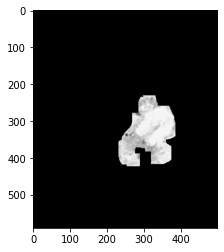

In [ ]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thresholding
final = cv2.bitwise_and(image,image,mask = mask) 
plt.imshow(final)

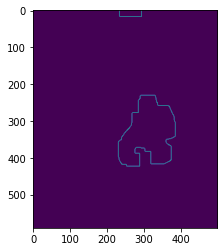

In [ ]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged
canny = auto_canny(closed)
plt.imshow(canny)

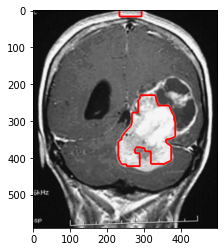

In [ ]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
gray_cntr=cv2.drawContours(image.copy(), cnts, -1, (255, 0, 0), 3)
plt.imshow(gray_cntr) 

Hence the tumor is detected with help of obtained contour

Applying Contouring on the entire brain image where foreground is the entire brain

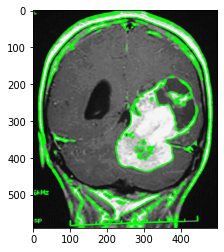

In [ ]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

                                      

# draw contours on the original image

image_copy = image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow( image_copy)


Contour detection algorithms was much more efficient as compared to GrabCut algo because Grabcut requires manual work of setting the rectangle dimensions which makes it quite inaccurate

## Background Subtraction

In [ ]:
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG() 

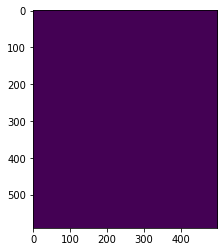

In [ ]:
fgmask = fgbg.apply(thresh.copy())  
  
plt.imshow( fgmask)

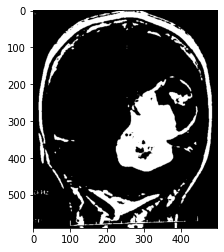

In [ ]:
gbg = cv2.createBackgroundSubtractorMOG2()
fgmask1 = gbg.apply(threshInv.copy())  
  
plt.imshow( fgmask1,cmap='gray')

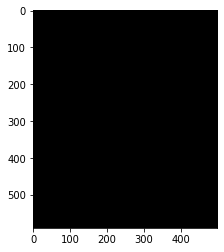

In [ ]:

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
  
# initializing subtractor 
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()
fgmask = fgbg.apply(threshInv.copy())
  
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)  
  
  
plt.imshow( fgmask,cmap='gray')


For the given BackgroundSubtractorMOG2 performed the best